In [1]:
import mglearn

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from md import *

In [3]:
from IPython.display import display

In [4]:
from sklearn.datasets import make_blobs

In [34]:
path='C:\\Windows\\Fonts\\H2GSRB.ttf'
fontprop=fm.FontProperties(fname=path,size=10)

Text(0, 0.5, '특성 1')

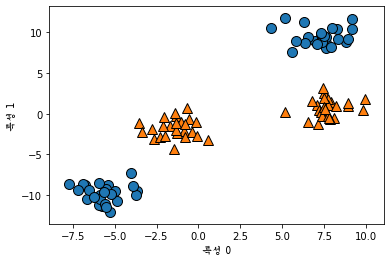

In [35]:
X,y=make_blobs(centers=4,random_state=8)

y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성 0',fontproperties=fontprop)
plt.ylabel('특성 1',fontproperties=fontprop)

### make_blobs¶
make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 다음 데이터 생성 코드의 결과를 보면 make_classification 함수로 만든 가상데이터와 모양이 다른 것을 확인 할 수 있다. make_blobs는 보통 클러스링 용 가상데이터를 생성하는데 사용한다. make_blobs 함수의 인수와 반환값은 다음과 같다.

* 인수:

n_samples : 표본 데이터의 수, 디폴트 100

n_features : 독립 변수의 수, 디폴트 20

centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3

cluster_std: 클러스터의 표준 편차, 디폴트 1.0

center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

In [9]:
import matplotlib as mpl
import matplotlib.font_manager as fm
print('버전:',mpl.__version__)
print('설치위치:',mpl.__file__)
print('설정위치:',mpl.get_configdir())
print('캐시위치:', mpl.get_cachedir())

print('설정파일위치:',mpl.matplotlib_fname())


버전: 3.1.0
설치위치: C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\__init__.py
설정위치: C:\Users\Affinity\.matplotlib
캐시위치: C:\Users\Affinity\.matplotlib
설정파일위치: C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [23]:
font_list=fm.findSystemFonts(fontpaths=None,fontext='ttf')

print(len(font_list))

font_list[:15]

f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[20:30]

995
995


['DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXSizeOneSym']

In [21]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]


[]

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성1:')

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


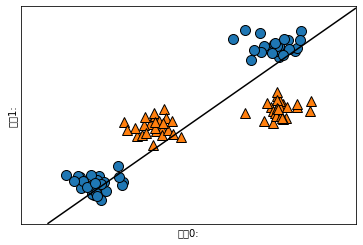

In [37]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성0:')
plt.ylabel('특성1:')

Text(0.5, 0, '특성1**2')

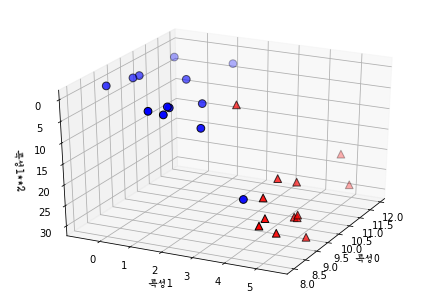

In [59]:
#두번째 특성을 제곱하여 추가
X_new=np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()
#3차원 그래프
ax=Axes3D(figure,elev=-152,azim=-26)
#y==0인 포인트를 먼저 그리고 그다음  y==1인 포인트를 그림
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b', cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^', cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel('특성0',fontproperties=fontprop)
ax.set_ylabel('특성1',fontproperties=fontprop)
ax.set_zlabel('특성1**2',fontproperties=fontprop)


C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1**특성2')

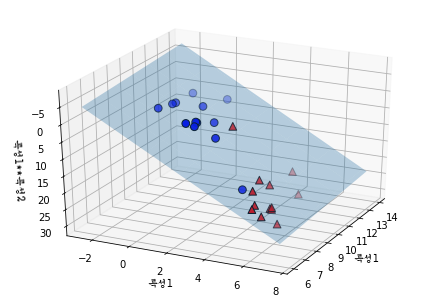

In [69]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#선형경계그리기

figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)

ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel('특성1',fontproperties=fontprop)
ax.set_ylabel('특성1',fontproperties=fontprop)
ax.set_zlabel('특성1**특성2',fontproperties=fontprop)

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'lavels'
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '특성2')

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


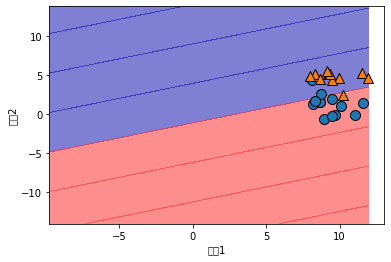

In [58]:
ZZ=YY*2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),lavels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성1')
plt.ylabel('특성2')

Text(0, 0.5, '특성1')

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


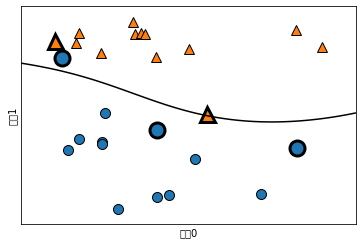

In [57]:
from sklearn.svm import SVC

X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
#데이터 포인트 그리기

mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel('특성0')
plt.ylabel('특성1')

* 매개변수 튜닝


C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py

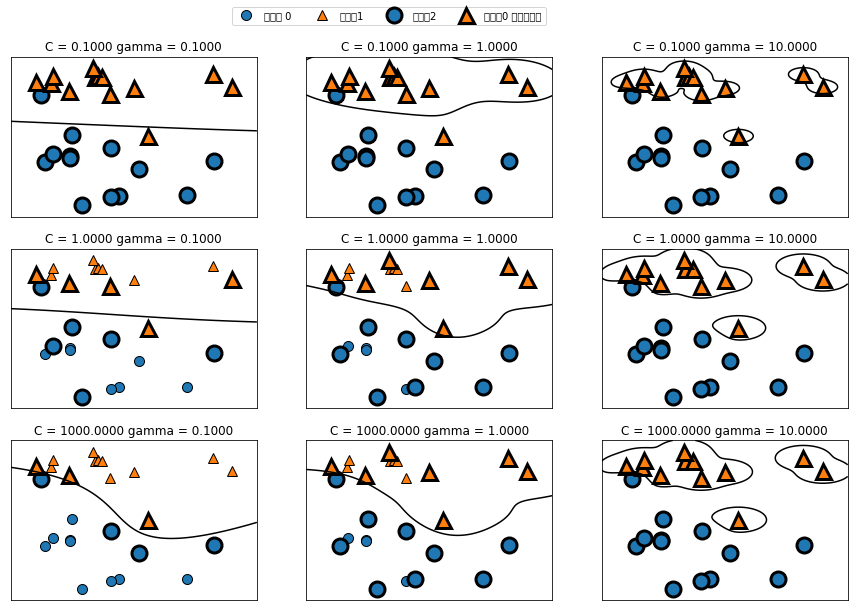

In [64]:
fig,axes = plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma, ax=a)
        
axes[0,0].legend(["클래스 0",'클래스1','클래스2','클래스0 서포트벡터','클래스1 서포트백터'],ncol=4,loc=(.9,1.2))


* svc- 암데이터- 데이터 처리가필요한경우

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [74]:
cancer=load_breast_cancer()

X_train,X_test, y_train, y_test=train_test_split(cancer.data,cancer.target, random_state=0)

svc=SVC()
svc.fit(X_train,y_train)

print('훈련정확도:{:2f}'.format(svc.score(X_train,y_train)))
print('테스트 새트 정확도:{:2f}'.format(svc.score(X_test,y_test)))

훈련정확도:1.000000
테스트 새트 정확도:0.629371


C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성크기')

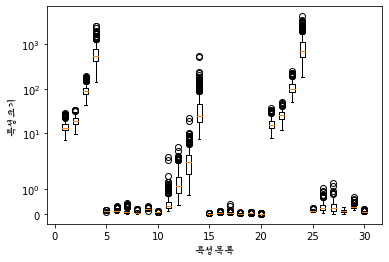

In [81]:
#각특성의 최솟값과 최댓값을 로스스케일로 나타내기
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')

plt.xlabel('특성목록',fontproperties=fontprop)
plt.ylabel('특성크기',fontproperties=fontprop)



In [89]:
#데이터 전처리


#훈련세트에서 특성별 최소값 계산
min_on_training=X_train.min(axis=0)

#훈련세트에서 특성별(최대갑-최소값)범위계산
range_on_training=(X_train-min_on_training).max(axis=0)

#훈련데이터에 최솟값을빼고 범위로나누면 각특성에대한 최소값은 0 최대값은1이됌

X_train_scaled=(X_train-min_on_training)/range_on_trainging
print('특성별 최소값/n',X_train_scaled.min(axis=0))
print('특성별 최대값/n',X_train_scaled.max(axis=0))

특성별 최소값/n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값/n [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [92]:
X_test_scaled=(X_test-min_on_training)/range_on_training
svc=SVC()
svc.fit(X_train_scaled,y_train)

print('훈련세트 정확도:{:.3f}'.format(svc.score(X_train_scaled,y_train)))
print('테스트세트 정확도:{:.3f}'.format(svc.score(X_test_scaled,y_test)))



훈련세트 정확도:0.948
테스트세트 정확도:0.951


C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


* naive bayes

In [101]:
from numpy import *

def loadDataSet():
    postingList=[['my','dog','has','flea','problems','help','please'],
                ['maybe','not','take','him','to','dog','park','stupid'],
                ['my','dalmation','is','so','cute','i','love','him'],
                ['stop','posting','stupid','worthless','gabage'],
                ['mr','licks','ate','my','steak','how','to','stop','him'],
                ['quit','buying','worthless','dog','food','stupid']]
    
    classVec=[0,1,0,1,0,1]  
    return postingList, classVec

def createVocabList(dataSet):
    vocabSet=set([])
    
    for document in dataSet:
        vocabSet=vocabSet | set(document)
    return list(vocabSet)
        

In [112]:
def setOfWOrds2Vec(vocabList,inputSet):
    returnVec=[0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)]=1
        else: 
            print('the word:{} is  nt in  my voca'.format(word))
    return returnVec

In [103]:
listOposts,listClasses=loadDataSet()

In [104]:
listOposts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'i', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'gabage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [105]:
myVocablist=createVocabList(listOposts)

In [108]:
myVocablist

['i',
 'ate',
 'him',
 'gabage',
 'buying',
 'stupid',
 'licks',
 'to',
 'worthless',
 'is',
 'dalmation',
 'so',
 'stop',
 'posting',
 'flea',
 'problems',
 'food',
 'my',
 'love',
 'help',
 'mr',
 'please',
 'steak',
 'quit',
 'take',
 'dog',
 'park',
 'has',
 'cute',
 'maybe',
 'not',
 'how']

In [113]:
setOfWOrds2Vec(myVocablist,listOposts[0])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0]

* 단어벡터로 확률 계산하기

In [176]:
def trainNBO(trainMatrix,trainCategory):
    numTrainDocs=len(trainMatrix)
    numWords=len(trainMatrix[0])
    pAbusive=sum(trainCategory)/float(numTrainDocs)
    pONum=zeros(numWords); p1Num=zeros(numWords)
    pODenom=0.0; p1Denom=0.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num+=trainMatrix[i]
            p1Denom+=sum(trainMatrix[i])
        else:
            pONum+=trainMatrix[i]
            pODenom+=sum(trainMatrix[i])
            
    p1Vect=(p1Num/p1Denom)
    p0Vect=(pONum/pODenom)
    
    return p0Vect, p1Vect, pAbusive

In [193]:
trainMat=[]
for postinDoc in listOposts:
    trainMat.append(setOfWOrds2Vec(myVocablist,postinDoc))

p0V,p1V,pAb=trainNBO(trainMat,listClasses)

* 검사 

In [198]:
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    p1=sum(vec2Classify*p1Vec)+log(pClass1)
    p0=sum(vec2Classify*p0Vec)+log(1.0-pClass1)

    if p1>p0:
        return 1 
    else : 
        return 0

def testingNB():
    listOposts,listClasses=loadDataSet()
    testEntry=['love','my','dalmation','jinman']
    thisDoc=array(setOfWOrds2Vec(myVocablist,testEntry))
    print('{}classified as:{}'.format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))
    testEntry=['stupid','garage']
    thisDoc=array(setOfWOrds2Vec(myVocablist,testEntry))
    print('{}classified as :{}'.format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))

In [199]:
testingNB()

the word:jinman is  nt in  my voca
['love', 'my', 'dalmation', 'jinman']classified as:0
the word:garage is  nt in  my voca
['stupid', 'garage']classified as :1


* roc 그려보기

In [200]:
from md import *

In [201]:
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [202]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fbr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operateing Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [203]:
data_X,class_label=make_classification(n_samples=1000,n_classes=2,weights=[1,1],random_state=1)
trainX,testX,trainy,testy=train_test_split(data_X,class_label,test_size=0.3,random_state=1)

In [204]:
model=KNeighborsClassifier()
model.fit(trainX,trainy)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [205]:
probs=model.predict_proba(testX)
porbs=probs[:,1]

roc=roc_curve(testy,probs)
print('ROc:{}'.format(roc))
auc=roc_auc_score(testy,probs)
print('AUC:%.2f' % auc)


ValueError: bad input shape (300, 2)

* k-fold

In [155]:

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris=load_iris()
KNN=KNeighborsClassifier()
scores=cross_val_score(KNN,iris.data,iris.target)
print('교차검증점수:', scores)

교차검증점수: [0.98039216 0.98039216 1.        ]


C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [158]:
#시간알아보기

from sklearn.model_selection import cross_validate
res=cross_validate(KNN,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.0004952 , 0.00054789, 0.        , 0.00052667, 0.        ]),
 'score_time': array([0.00148964, 0.0009923 , 0.00147414, 0.00097227, 0.00148726]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

* grid search

In [160]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target, random_state=0)
print('훈련세트의 크기:{} 테스트 세트의크기:{}'.format(X_train.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        
        score=svm.score(X_train,y_train)
        
        if score > best_score:
            best_score=score
            best_parameter={'C':C,'gamma':gamma}
            
            
print('최고점수:{:2f}'.format(best_score))
print('최적 매개변수:',best_parameter)

훈련세트의 크기:112 테스트 세트의크기:38
최고점수:1.000000
최적 매개변수: {'C': 100, 'gamma': 1}


In [161]:
from sklearn.svm import SVC
X_trainval,X_test,y_trainval,y_test=train_test_split(iris.data,iris.target, random_state=0)
print('훈련세트의 크기:{} 테스트 세트의크기:{}'.format(X_train.shape[0],X_test.shape[0]))

X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=1)

print('훈련세트의 크기:{} 검증세트의 크기:{}\n'.format(X_train.shape[0],X_valid.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        
        score=svm.score(X_train,y_train)
        
        if score > best_score:
            best_score=score
            best_parameter={'C':C,'gamma':gamma}
            
            
print('최고점수:{:2f}'.format(best_score))
print('최적 매개변수:',best_parameter)

훈련세트의 크기:112 테스트 세트의크기:38
훈련세트의 크기:84 검증세트의 크기:28

최고점수:1.000000
최적 매개변수: {'C': 100, 'gamma': 0.01}


In [165]:
svm=SVC(**best_parameter)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
print('검증세트에서 최고점수:{:.2f}'.format(best_score))

print('최적 매개변수:',best_parameter)
print('최적 매개변수에서 테스트 세트 점수:{:.2f}'.format(test_score))

검증세트에서 최고점수:1.00
최적 매개변수: {'C': 100, 'gamma': 0.01}
최적 매개변수에서 테스트 세트 점수:0.97


* exploratory data analysis-titanic


In [207]:
titanic=pd.read_csv('titanic.csv')

In [208]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [209]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [212]:
titanic['Survived']=titanic['Survived'].astype(object)
titanic['Pclass']=titanic['Pclass'].astype(object)

In [214]:
missing_df=titanic.isnull().sum().reset_index()
missing_df.columns=['column','count']
missing_df['ratio']=missing_df['count']/titanic.shape[0]
missing_df.loc[missing_df['ratio']!=0]


,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


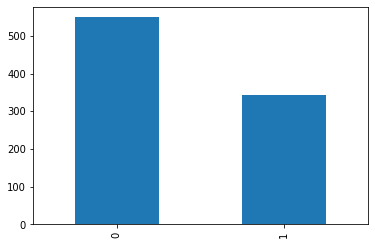

In [215]:
titanic['Survived'].value_counts().plot(kind='bar')
plt.show()

In [216]:
category_feature=[col for col in titanic.columns if titanic[col].dtypes=='object']

category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [217]:
category_feature=list(set(category_feature)-set(['Survived']))
category_feature

['Sex', 'Name', 'Ticket', 'Pclass', 'Cabin', 'Embarked']

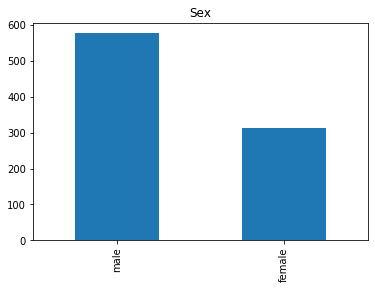

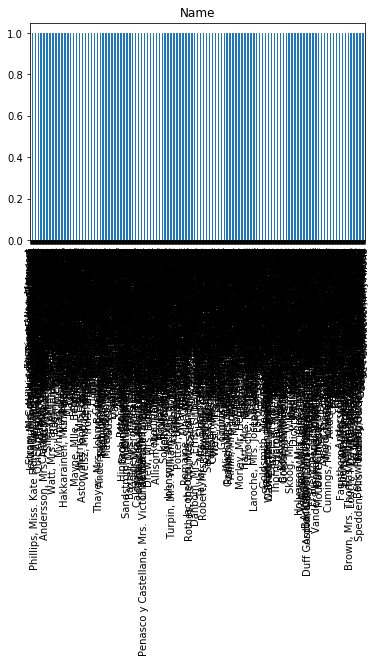

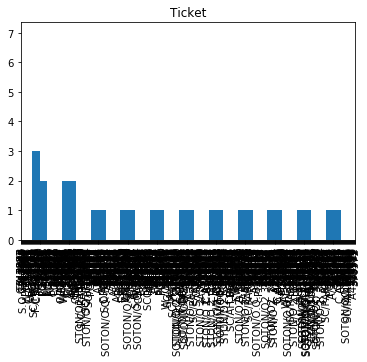

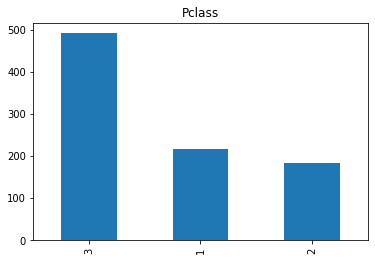

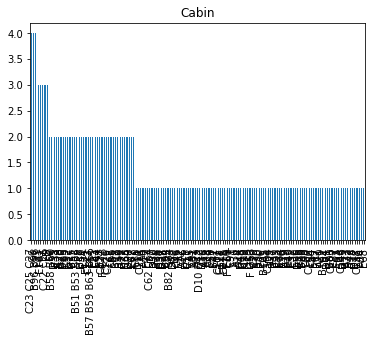

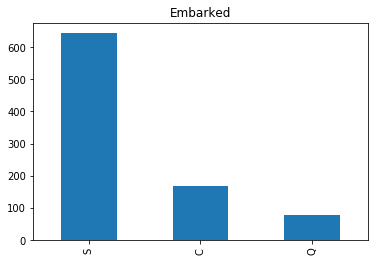

In [218]:
for col in category_feature:
    titanic[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

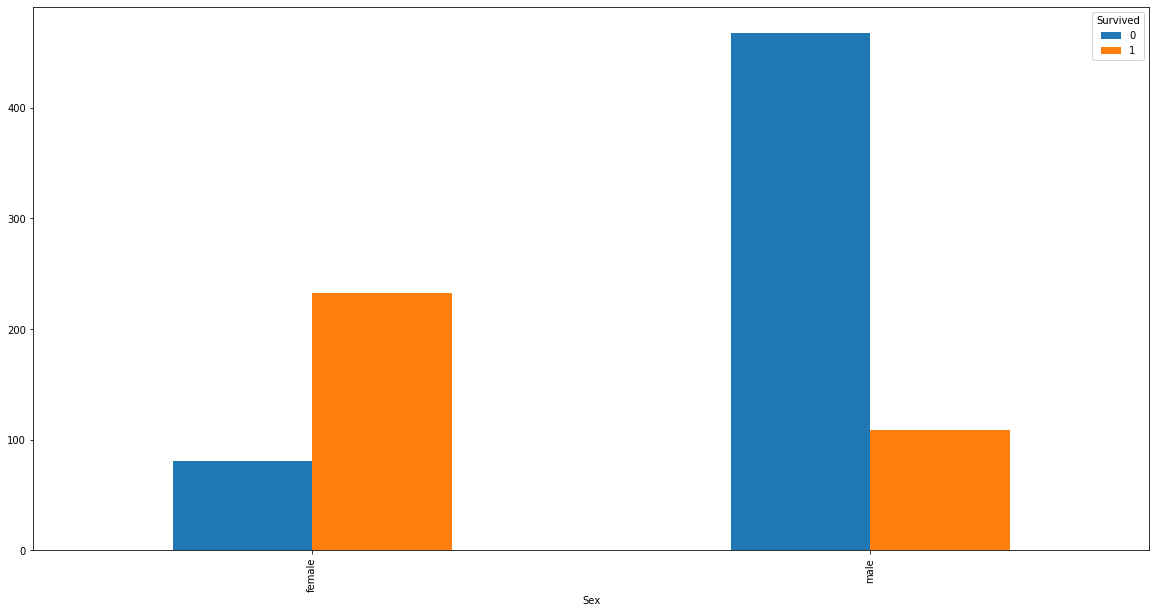

In [220]:
sex_df=titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar',figsize=(20,10))
plt.show()

In [221]:
numerical_feature=list(set(titanic.columns)-set(category_feature)-set(['PassengerId','Survived']))
numerical_feature=np.sort(numerical_feature)

In [222]:
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

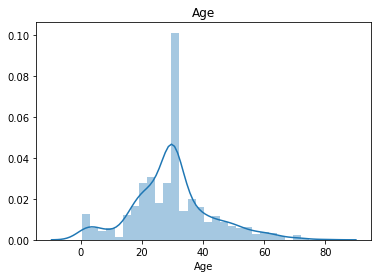

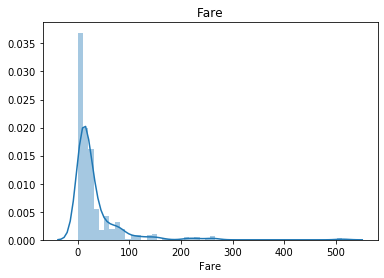

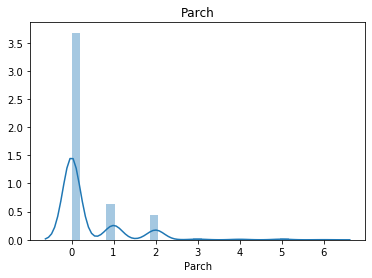

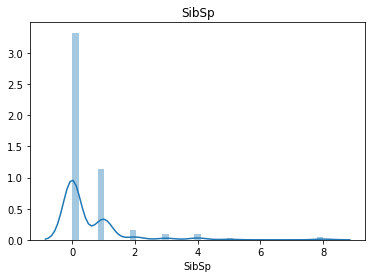

In [223]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(),col])
    plt.title(col)
    plt.show()

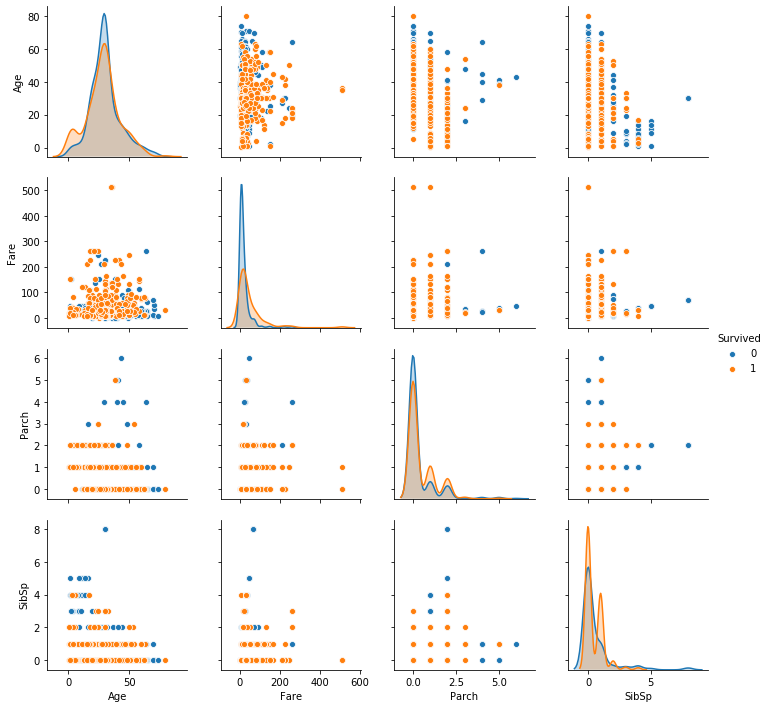

In [225]:
sns.pairplot(titanic[list(numerical_feature)+['Survived']],hue='Survived',
            x_vars=numerical_feature,y_vars=numerical_feature)
plt.show()

In [4]:
from md import *

In [5]:
trn=pd.read_csv('ssd_train.csv',na_values=[-1,-1.0])

In [6]:
tst=pd.read_csv('ssd_test.csv',na_values=[-1,-1.0])

In [7]:
tst['target']=np.nan
df=pd.concat([trn,tst],axis=0)
%matplotlib inline
def bar_plot(col,data,hue=None):
    f,ax=plt.subplots(figsize=(10,5))
    sns.countplot(x=col,hue=hue,data=data,alpha=0.5)
    plt.show()
    
def dist_plot(col,data):
    f,ax=plt.subplots(figsize=(10,5))
    sns.displot(data[col].dropna(),kde=False,bins=10)
    plt.show()
    
def bar_plot_ci(col,data):
    f,ax=plt.subplots(figsize=(10,5))
    sns.barplot(x=col,y='target',data=data)
    plt.show()

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
a=[]
for i in tst.columns:
    if type(i)=='int64':
        a.append(i)
        
a

[]

In [11]:
trn.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [9]:
tst.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


In [10]:
binary=['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin','ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin']

category=[ 'ps_ind_02_cat', 'ps_ind_04_cat',
       'ps_ind_05_cat','ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',]

integer=[]


In [26]:
a=np.array(trn.columns)
a[type(a)=='int64']

[]


In [19]:
feature=['ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin']

In [20]:
df=pd.concat([trn,tst],axis=0)
corr_sub=df[feature].corr()

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=500,noise=0.25,random_state=3)

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred=dt_clf.predict(X_test)

In [31]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,bootstrap=True,n_jobs=-1,oob_score=True)

In [32]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_


0.9306666666666666

In [33]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.904

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


In [38]:
Xm,ym=make_moons( noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,ym,stratify=ym,random_state=42)

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging=BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,n_jobs=-1,random_state=42) 
bagging.fit(Xm_train,ym_train)  #n_estimator  : decision tree 몇개할건지


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

# 25일

In [41]:
from md import *

In [42]:
import mglearn

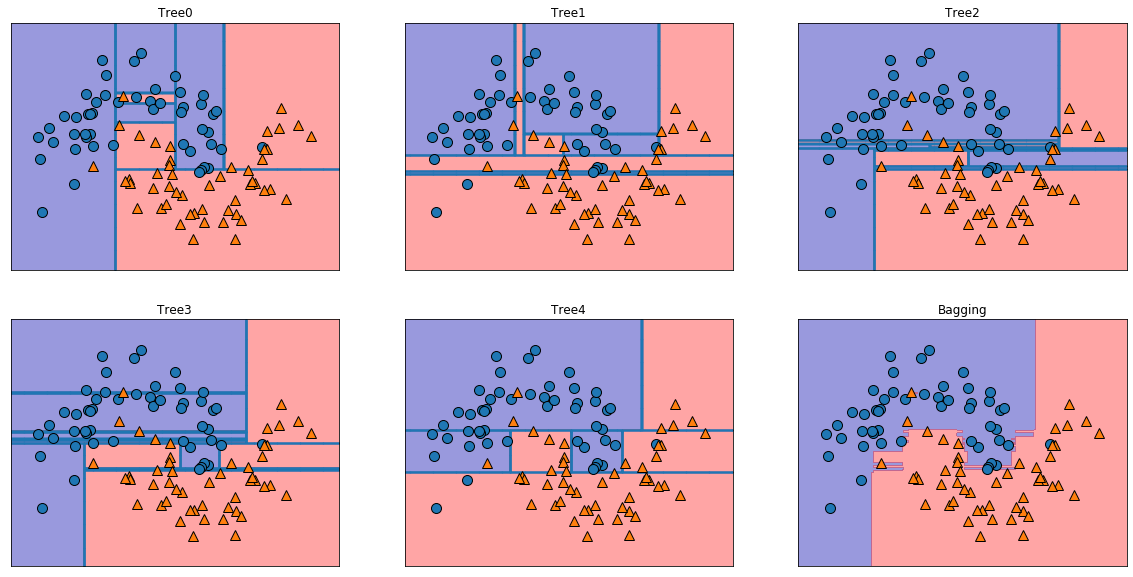

In [49]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title('Tree{}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
    
mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()
    
